Regression Analysis:

Linear Regression (predicting a continuous value)

Poisson Regression (predicting a count value)

Logistic Regression (predicting a categorical value)

Linear Regression

Dataset : Car Features and MSRP
https://www.kaggle.com/datasets/CooperUnion/cardataset/data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Step 1 : Load the data

In [3]:
file_path = '/content/data.csv'
df = pd.read_csv(file_path)

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Step 2: Understand the Structure of the Data

In [6]:
print(df.info())  # Data types and non-null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [8]:
print(df.describe())  # Summary stats for numerical columns


               Year    Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11845.00000      11884.000000     11908.000000   
mean    2010.384338    249.38607          5.628829         3.436093   
std        7.579740    109.19187          1.780559         0.881315   
min     1990.000000     55.00000          0.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     2015.000000    227.00000          6.000000         4.000000   
75%     2016.000000    300.00000          6.000000         4.000000   
max     2017.000000   1001.00000         16.000000         4.000000   

        highway MPG      city mpg    Popularity          MSRP  
count  11914.000000  11914.000000  11914.000000  1.191400e+04  
mean      26.637485     19.733255   1554.911197  4.059474e+04  
std        8.863001      8.987798   1441.855347  6.010910e+04  
min       12.000000      7.000000      2.000000  2.000000e+03  
25%       22.000000     16.000000    549

In [9]:
print(df.isnull().sum())  # Count of missing values per column


Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [10]:
print(df.nunique())  # Count of unique values in each column

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64


Step 3: Visualize Data Distributions

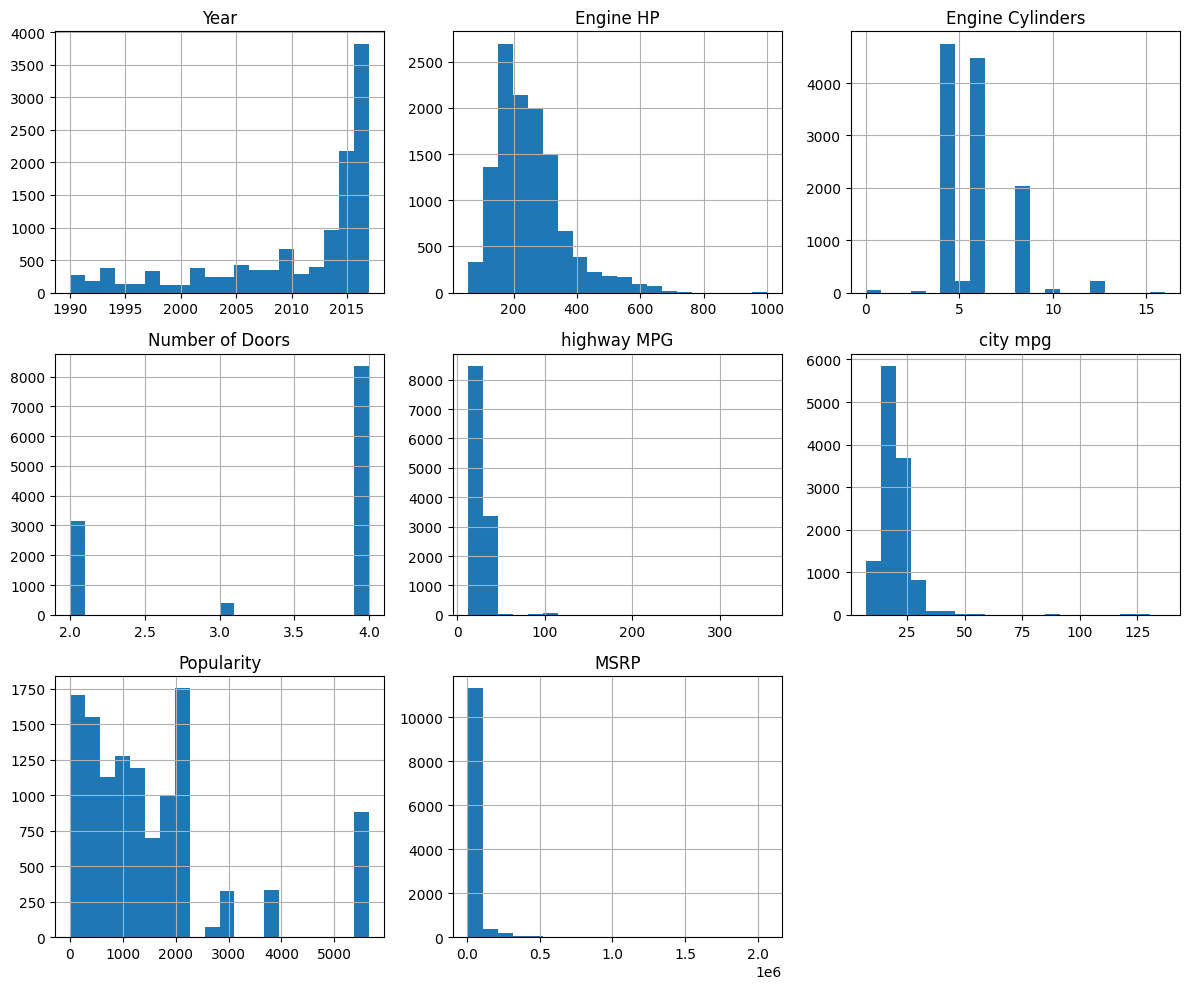

In [11]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

In [13]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


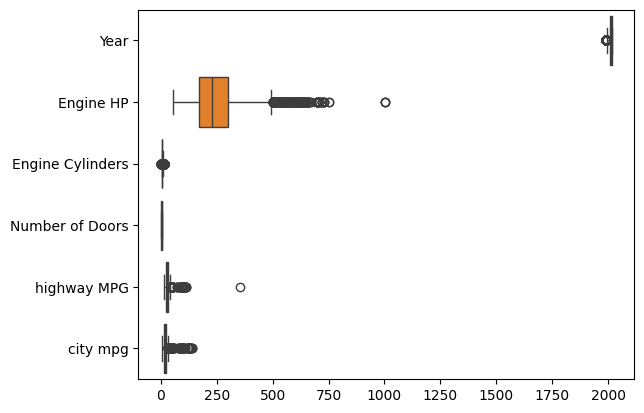

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is a Pandas DataFrame
sns.boxplot(data=df.iloc[:, :14], orient='h')  # Select first 14 columns
plt.show()


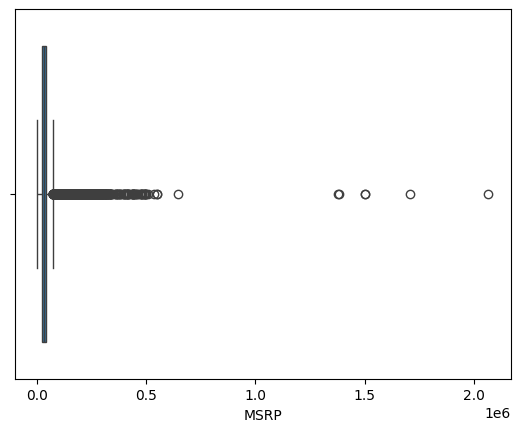

In [21]:
import seaborn as sns

sns.boxplot(data=df.iloc[:,15], orient='h')
plt.show()


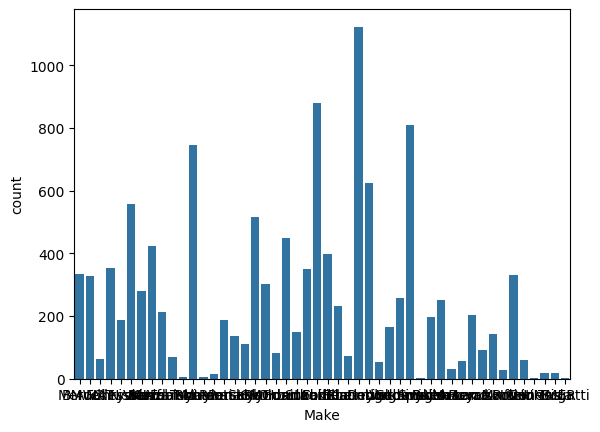

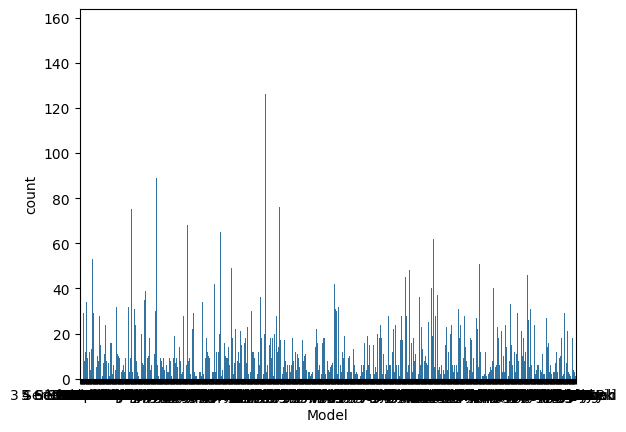

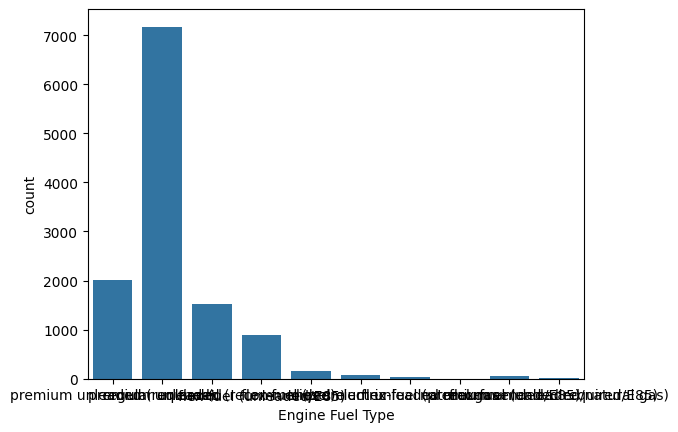

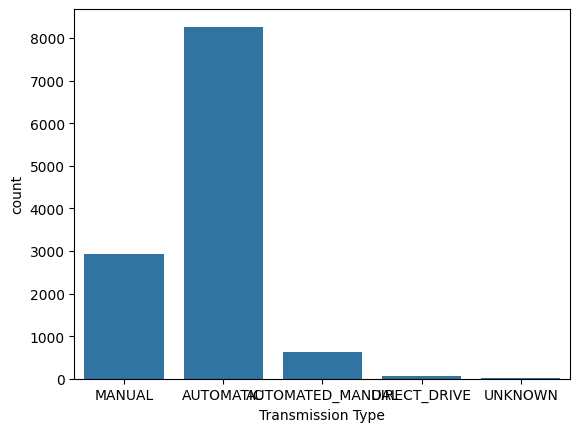

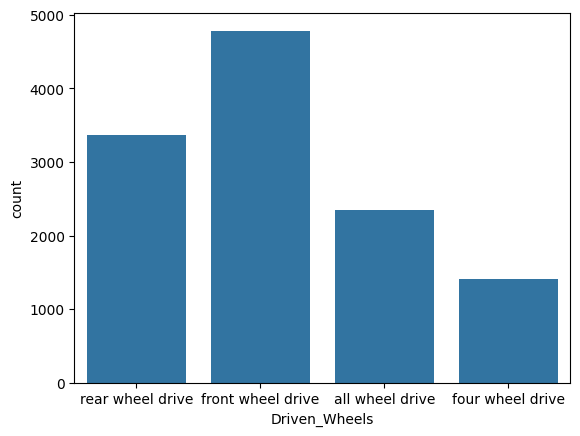

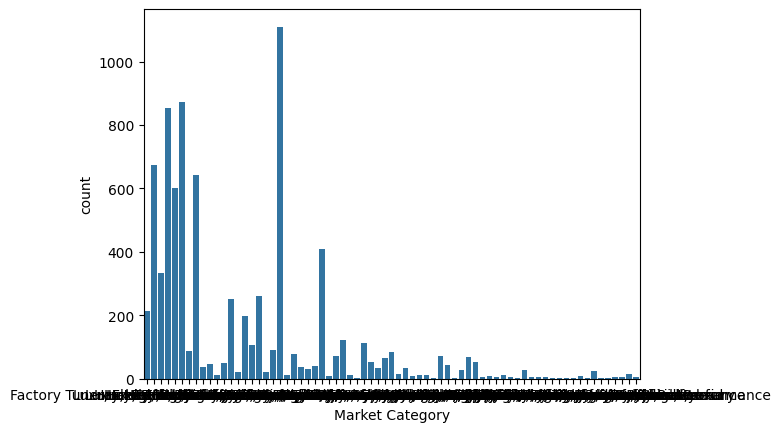

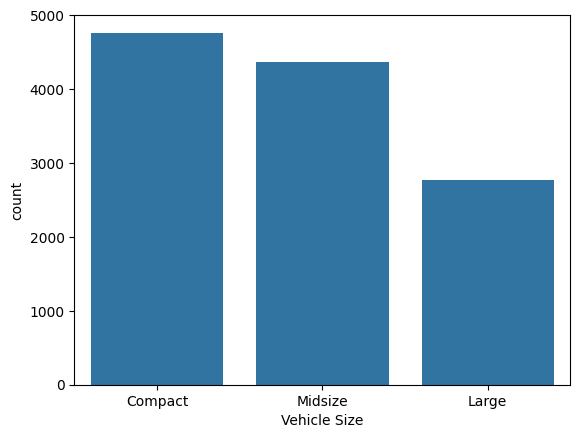

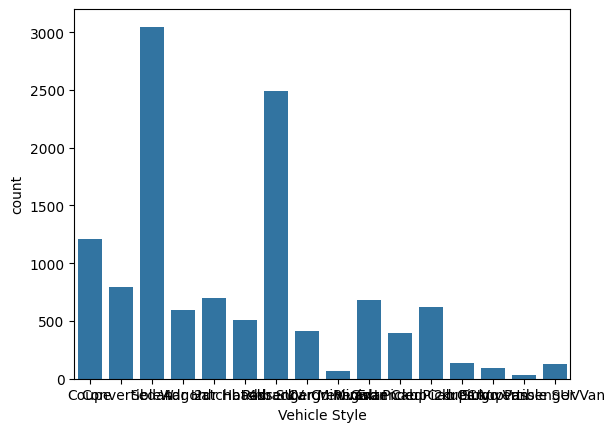

In [22]:
for col in df.select_dtypes(include='object').columns:
    sns.countplot(x=col, data=df)
    plt.show()


Step 4: Analyze Relationships Between Variables

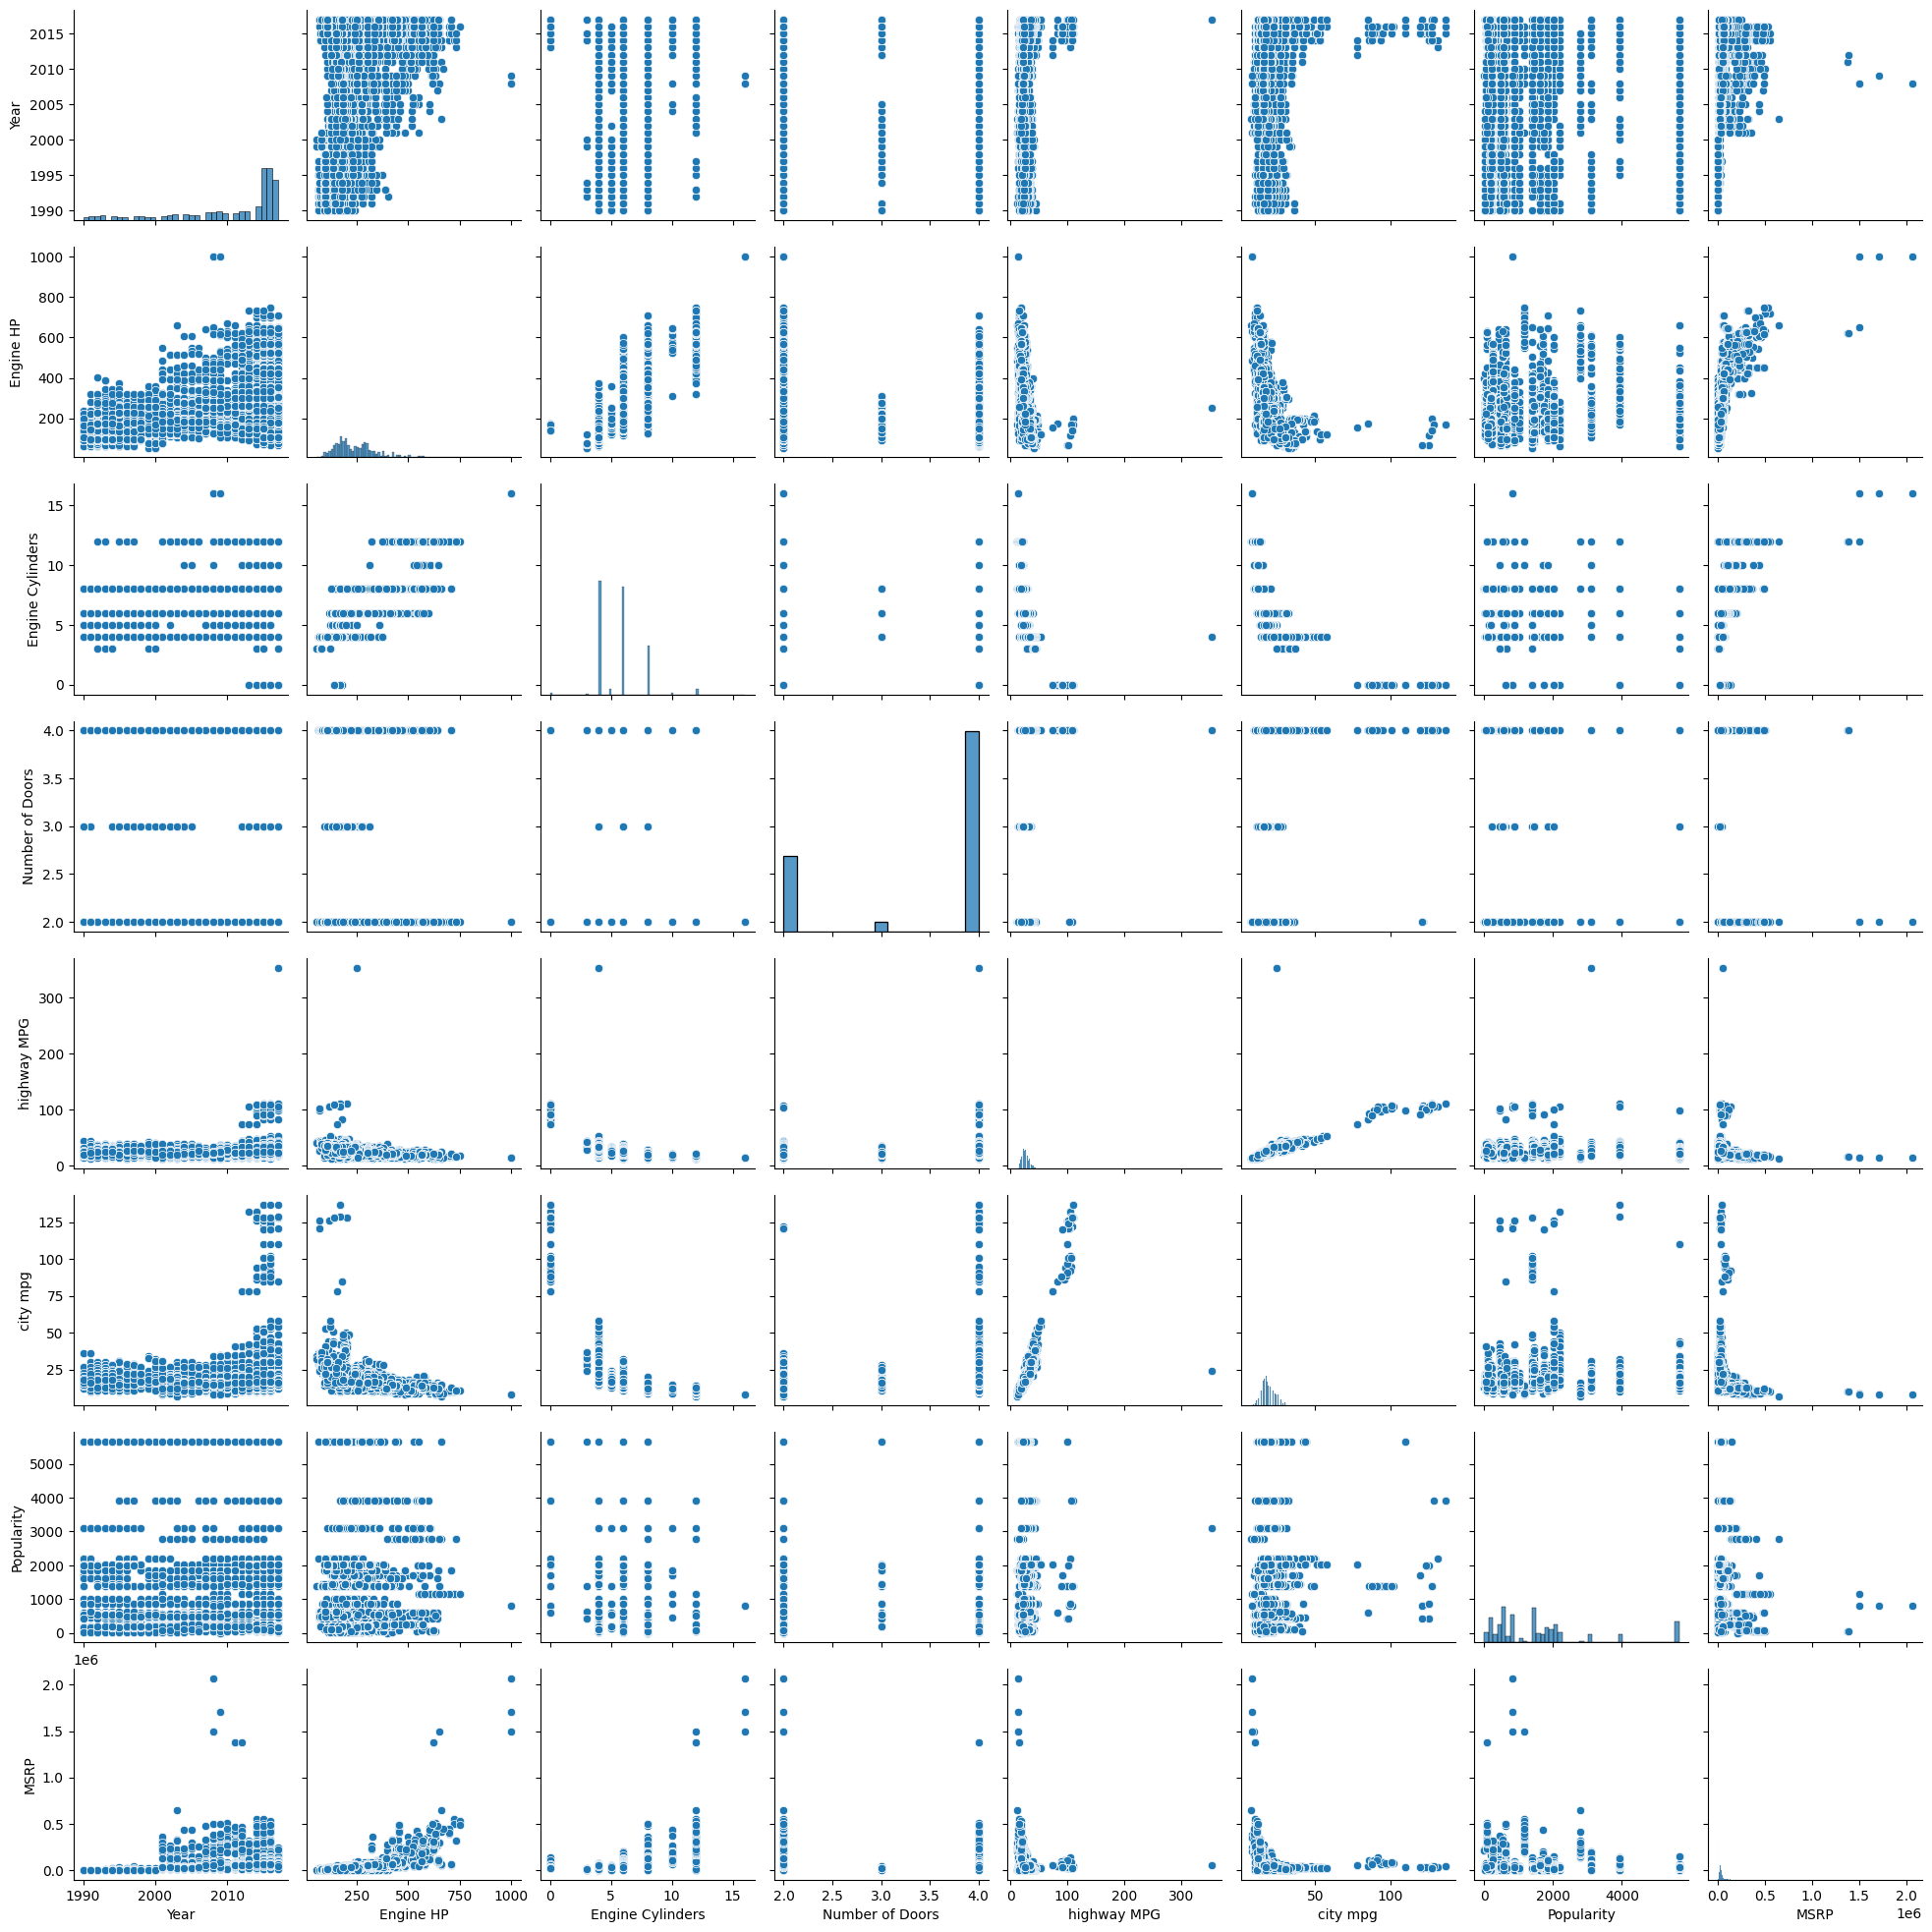

In [23]:
sns.pairplot(df)
plt.show()


In [ ]:
for col in df.select_dtypes(include='object').columns:
    sns.countplot(x=col, data=df)
    plt.show()

In [29]:
df2 = df.select_dtypes(include=['float64', 'int64'])

In [30]:
df2.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500


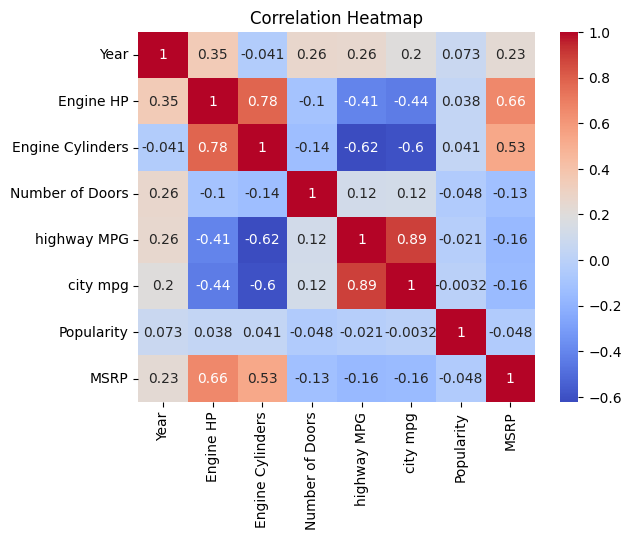

In [31]:
corr = df2.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Step 5 : Handling missing or incorrect data

In [33]:
# Fill missing values
for column in df.select_dtypes(include=[np.number]).columns:
    df[column].fillna(df[column].median(), inplace=True)

for column in df.select_dtypes(include=[object]).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [35]:
print(df.isnull().sum())  # Count of missing values per column

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11914 non-null  object 
 4   Engine HP          11914 non-null  float64
 5   Engine Cylinders   11914 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11914 non-null  float64
 9   Market Category    11914 non-null  object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [37]:
unique_makes = df['Make'].unique()
print(unique_makes)

['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']


In [38]:
unique_makes_count = df['Make'].nunique()
print(unique_makes_count)

48


In [39]:
make_counts = df['Make'].value_counts()
print(make_counts)

Make
Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Spyke

In [40]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# List all the categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Check the result
print(df.head())


   Make  Model  Year  Engine Fuel Type  Engine HP  Engine Cylinders  \
0     4      1  2011                 8      335.0               6.0   
1     4      0  2011                 8      300.0               6.0   
2     4      0  2011                 8      300.0               6.0   
3     4      0  2011                 8      230.0               6.0   
4     4      0  2011                 8      230.0               6.0   

   Transmission Type  Driven_Wheels  Number of Doors  Market Category  \
0                  3              3              2.0               38   
1                  3              3              2.0               67   
2                  3              3              2.0               64   
3                  3              3              2.0               67   
4                  3              3              2.0               63   

   Vehicle Size  Vehicle Style  highway MPG  city mpg  Popularity   MSRP  
0             0              8           26        19      

In [43]:
import numpy as np
from scipy import stats

# Calculate Z-scores for each column (numeric columns only)
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Define a threshold for Z-scores (e.g., 3 for outliers)
threshold = 3

# Identify rows where any column has a Z-score greater than the threshold
df_no_outliers1 = df[(z_scores < threshold).all(axis=1)]

# Check the shape of the resulting DataFrame
print(f"Original data shape: {df.shape}")
print(f"Data shape after removing outliers: {df_no_outliers1.shape}")


Original data shape: (11914, 16)
Data shape after removing outliers: (11232, 16)


In [44]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numeric column
Q1 = df.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = df.select_dtypes(include=[np.number]).quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows where all numeric columns are within the bounds
df_no_outliers2 = df[~((df.select_dtypes(include=[np.number]) < lower_bound) | (df.select_dtypes(include=[np.number]) > upper_bound)).any(axis=1)]

# Check the shape of the resulting DataFrame
print(f"Original data shape: {df.shape}")
print(f"Data shape after removing outliers: {df_no_outliers2.shape}")


Original data shape: (11914, 16)
Data shape after removing outliers: (8279, 16)


In [45]:
df_no_outliers2.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,1,2011,8,335.0,6.0,3,3,2.0,38,0,8,26,19,3916,46135
1,4,0,2011,8,300.0,6.0,3,3,2.0,67,0,6,28,19,3916,40650
2,4,0,2011,8,300.0,6.0,3,3,2.0,64,0,8,28,20,3916,36350
3,4,0,2011,8,230.0,6.0,3,3,2.0,67,0,8,28,18,3916,29450
4,4,0,2011,8,230.0,6.0,3,3,2.0,63,0,6,28,18,3916,34500


In [46]:
X = df_no_outliers2.iloc[:,:14]

In [52]:
X = df_no_outliers2.iloc[:,:14]
y = df_no_outliers2['MSRP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 59158645.47738782
R-squared: 0.7521770801200954


In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluate
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)


Mean Squared Error (MSE): 59158645.47738746
Root Mean Squared Error (RMSE): 7691.465756108354
Mean Absolute Error (MAE): 5701.911020747767
R-squared: 0.7521770801200969


Feature Selection